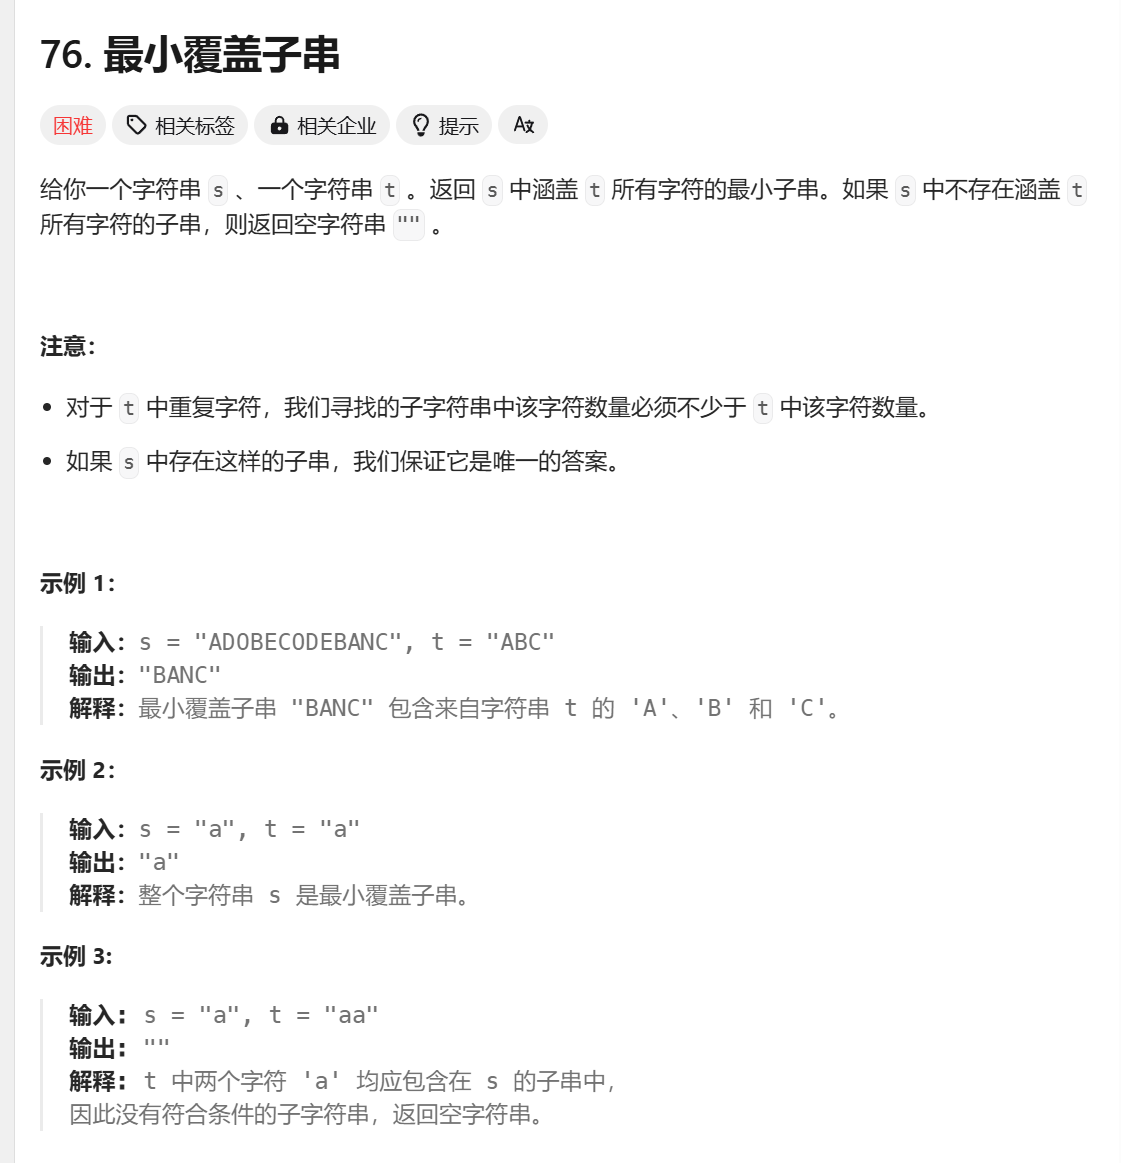

In [24]:
from collections import defaultdict
class Solution:
    def judge_Include(self, dicta, dictb) -> bool:
        for key in dicta:
            if dictb[key] < dicta[key]:
                return False
        return True
    def minWindow(self, s: str, t: str) -> str:
        # 想要时间复杂度为O（M + N）不能排序
        # 先每次移动右指针使得窗口中包含所有的字符，然后将左指针向右移动使得子串长度最小
        # 然后记录当前的结果
        # 最后移动左指针，因为当前左指针肯定是子串中的一个元素之一，移动左子串后，后面找到的子串肯定与之前的不太一样
        size = len(s)
        window = defaultdict(int)  # 用字典来统计当前窗口中的字符数目是不是与下面的目标相同
        target = defaultdict(int)
        res = ""
        for i, val in enumerate(t):
            target[val] += 1
        right, left = 0, 0
        while left <= right and right < size:
            while not self.judge_Include(target, window) and right < size:
                if s[right] in target:  # 我们只统计目标中包括的元素
                    window[s[right]] += 1
                right += 1
            while self.judge_Include(target, window): # 移动到最小包含的时候
                if s[left] in t:
                    window[s[left]] -= 1
                left += 1

            left -= 1
            window[s[left]] += 1
            if not res and self.judge_Include(target, window):
                res = s[left:right]
            if right <= size and self.judge_Include(target, window) and  len(res) > right - left:
                res = s[left:right]
            left += 1
            window[s[left - 1]] -= 1
        return res
                
          
                

b = Solution()
print(b.minWindow("ADOBECODEBANC","ABC"))
                                                                                                                    
                
a = Solution()
print(a.minWindow("bba","ab"))
                                                                                                                    

BANC
ba


In [ ]:
from collections import Counter
# 它是先更新，再缩短左边界，（保证在涵盖的前提下更新答案，而我们先缩短就很难保证了） 而且它统计的是一个索引，占用空间小
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        ans_left, ans_right = -1, len(s)
        left = 0
        cnt_s = Counter()  # s 子串字母的出现次数
        cnt_t = Counter(t)  # t 中字母的出现次数
        for right, c in enumerate(s):  # 移动子串右端点
            cnt_s[c] += 1  # 右端点字母移入子串
            while cnt_s >= cnt_t:  # 涵盖
                if right - left < ans_right - ans_left:  # 找到更短的子串
                    ans_left, ans_right = left, right  # 记录此时的左右端点
                cnt_s[s[left]] -= 1  # 左端点字母移出子串
                left += 1  # 移动子串左端点
        return "" if ans_left < 0 else s[ans_left: ans_right + 1]
    